In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

## MPI strong scaling

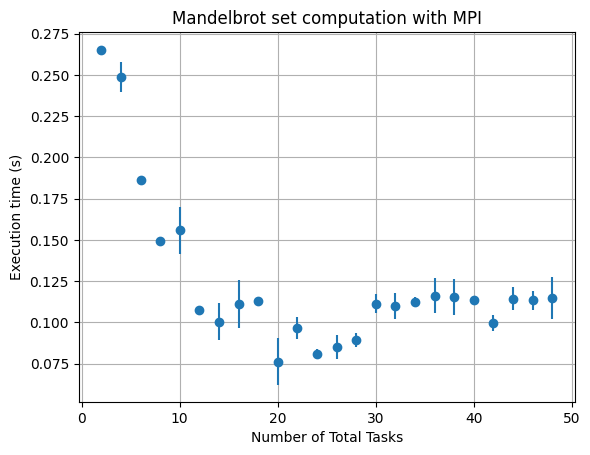

In [23]:
omp_times = pd.read_csv('mpi_strong_scaling.csv')

mean_times = omp_times.groupby('Total Tasks').mean()
std_times = omp_times.groupby('Total Tasks').std()

plt.errorbar(mean_times.index, mean_times['Elapsed Time(s)'], yerr=std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Number of Total Tasks')
plt.ylabel('Execution time (s)')
plt.title('Mandelbrot set computation with MPI')
plt.grid()
plt.show()

## MPI weak scaling

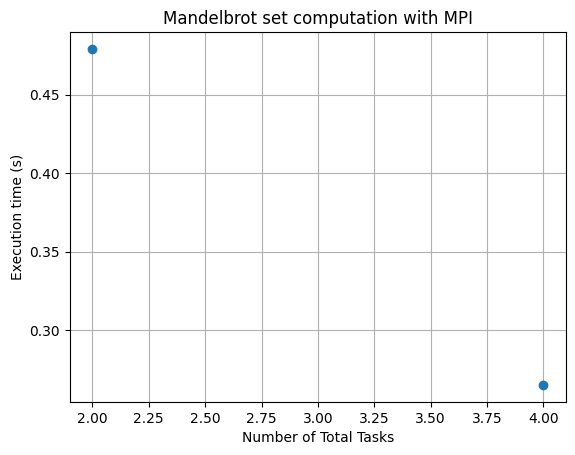

In [24]:
omp_times = pd.read_csv('mpi_weak_scaling.csv')

mean_times = omp_times.groupby('Total Tasks').mean()
std_times = omp_times.groupby('Total Tasks').std()

plt.errorbar(mean_times.index, mean_times['Elapsed Time(s)'], yerr=std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Number of Total Tasks')
plt.ylabel('Execution time (s)')
plt.title('Mandelbrot set computation with MPI')
plt.grid()
plt.show()

## OMP strong scaling

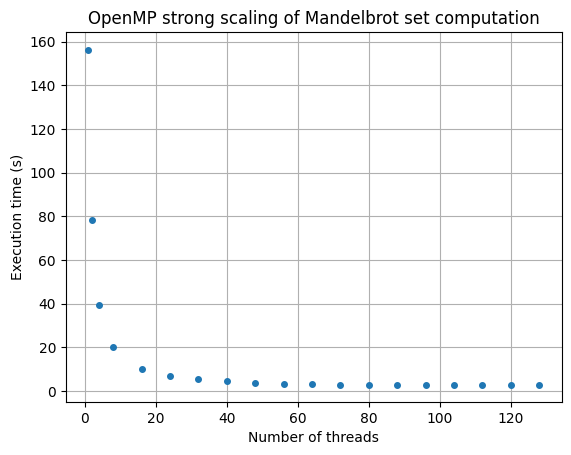

In [21]:
omp_times = pd.read_csv('omp_strong_scaling.csv')

mean_times = omp_times.groupby('Threads').mean()
std_times = omp_times.groupby('Threads').std()

# The sd are too small to be seen
plt.errorbar(mean_times.index, mean_times['Elapsed Time(s)'], yerr=std_times['Elapsed Time(s)'], fmt='o', markersize=4)
plt.xlabel('Number of threads')
plt.ylabel('Execution time (s)')
plt.title('OpenMP strong scaling of Mandelbrot set computation')
plt.grid()
plt.show()

## OMP weak scaling

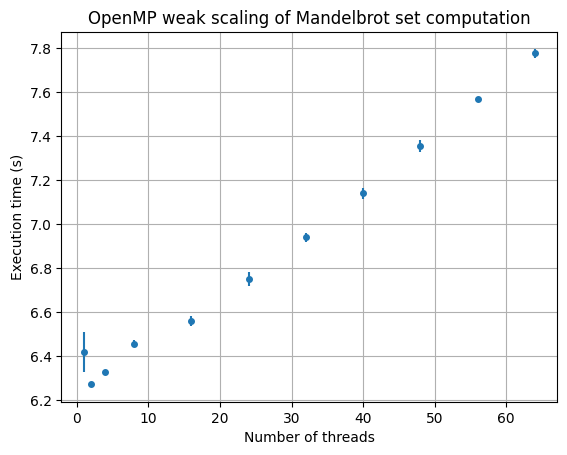

In [22]:
omp_times = pd.read_csv('omp_weak_scaling.csv')

mean_times = omp_times.groupby('Threads').mean()
std_times = omp_times.groupby('Threads').std()

plt.errorbar(mean_times.index, mean_times['Elapsed Time(s)'], yerr=std_times['Elapsed Time(s)'], fmt='o', markersize=4)
plt.xlabel('Number of threads')
plt.ylabel('Execution time (s)')
plt.title('OpenMP weak scaling of Mandelbrot set computation')
plt.grid()
plt.show()